<h1 align="center">HA #1 Report on choosing dataset</h1>

**Dataset history**

The dataset comes from a 1994 study about the population biology of blacklip abalone (Haliotis rubra) from the North Coast and Islands of Bass Strait. It was published to the UCI Machine Learning Repository in 1995 by Sam Waugh from the Department of Computer Science at the University of Tasmania (Australia). The original dataset was modified by removing objects with missing values and scaling continuous values by dividing by 200. 

**Relevant information paragraph**

The general problem of the dataset is the age (and thus count of rings) prediction of the abalone using its phisical measurements. In order to get the age of abalone the scientist should cut the shell through the cone at first, stain it and then count up its rings using microscope. Thereby it is time-consuming and definitely dull task. In that case the problem is sufficiently substantial. 
So, the principal reason I choose this dataset is its striking canonicity. Saying that I mean there are both nominal and real valued features, the amount of features and objects is good enought and, in addition, there is absence of missing data. Thus, the abalone dataset is highly prepared and comfortable for educational purpose. So, I hope I will be enjoy working on that though my Core Data Analysis course. It is clear. It is pleasant to calculate. So I suppose it is like Dostoevsky in Russian literature or Van Gogh art, it is a kind of Computer Science genre classics. That is why I choose the ablone dataset. 
   
**Explanation of the data (Attributes)**

There are 8 features. Next I will descrbe them all with its accepted values. 
Sex is the nominal feature with the value from the set {M, F, I(infant)}.
All next features were scaled by dividing by 200.
Length feature is the longest shell measurement which takes values from the interval (0.075, 0.815).
Diameter is a continuous feature which is perpendicular to length. Its values are from 0.055 to 0.650.
Height is the vertical shell measurement with meat in particular. 
Whole weight (whole_w in table) is an abalon's full weight with the value from 0.002 to 2.826. Cognitively to note that the black abalone has sufficiently large mass. Sometimes it reaches up to 565 grams and more.
Shucked weight is the meat mass measurement (without the shell, which is logical). Shucked_w's values are between 0.001 and 1.488 (which is 0.2 and 297.6 grams, respectively, in original dataset).
The Viscera weight comes after the bleeding, so it is a gut weight taking values from 0.001 to 0.760 (grams dividing by 200).
Next measurement is a shell mass after being dried, which is important to note, because of the fact that similar abalones can collect significantly different amount of water.
And the target variable is a rings count what refers to the age by adding 1.5 year for each ring.

There are 4177 instances with 8 features

The dataset is located in "abalone.csv" file. Each string means 1 object with features separating by "," symbol.

**Statistics additionals**

The following table shows some statistic information like mean and standart diviation.


           Length   Diam     Height   Whole    Shucked  Viscera  Shell    Rings
    Mean   0.524	0.408	0.140	0.829	0.359	0.181	0.239	9.934
	SD	 0.120	0.099	0.042	0.490	0.222	0.110	0.139	3.224


Finally, a few words about the **technologies** I use.

Core language is python v3.4.
Pandas is the python's module for visualization and simple data processing.
I use numpy for comfortable matrix operations and matplotlib for a graphical representation of data.
In the end, sklearn python module is a powerful set of the most common machine learning tackle including the regression.

Next, I will try to comment on the nontrivial areas to clarify the situation.



<h1 align="center">HA #2 Gaussian, 95% confidence interval, bootstrap for the distribution of the
mean</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import itertools
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint 
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans

In [2]:
pass_data = pd.read_csv('abalone.csv', header=None)
pass_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_w', 'Shucked_w', 'Viscera_w', 'Shell_w', 'Rings']
pass_data.head(10) #there is data sample

,Sex,Length,Diameter,Height,Whole_w,Shucked_w,Viscera_w,Shell_w,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


i form two groups of abalones consist of 100 elements each and analyse its "diameter" feature as x 

In [4]:
ab_diams1 = np.array(list(pass_data["Diameter"][:100]), dtype=float)
ab_diams2 = np.array(list(pass_data["Diameter"][100:200]), dtype=float)
print("mean of the first group", ab_diams1.mean(), "|", "mean of the second group", ab_diams2.mean())

mean of the first group 0.3948 | mean of the second group 0.4009


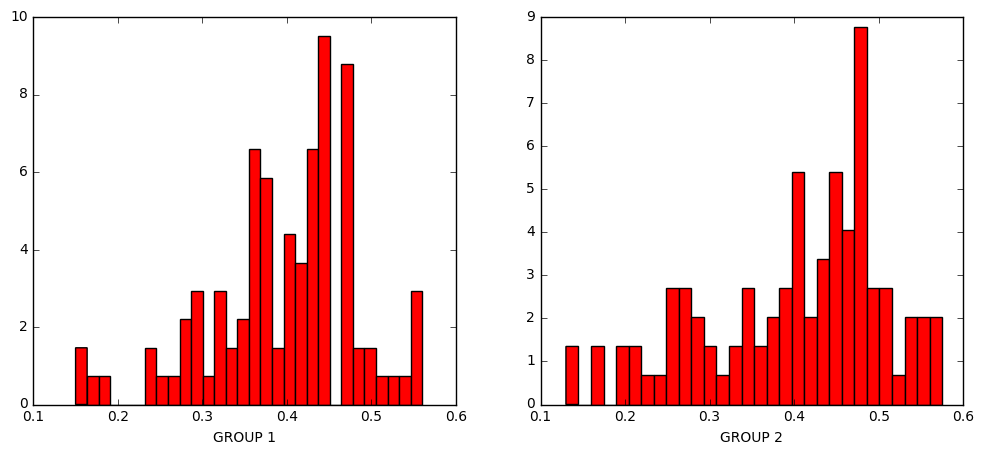

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.xlabel("GROUP 1")
bins1 = plt.hist(ab_diams1, 30, normed=1, facecolor='red', alpha=1)

plt.subplot(122)
plt.xlabel("GROUP 2")
bins1 = plt.hist(ab_diams2, 30, normed=1, facecolor='red', alpha=1)


the question (it arose from the comparison of the means): whether snails in the second group have more wide shells in average than in the second or not? It is not clear from the graphs. Let's check it using bootstrap (i form 2 groups of vectors(5000 each) of abalones shell diameters with the length of 100 randomly from the first and second groups and then analyse the density func of difference with means in diam5000_1 and diam5000_2). We can do it thanks to central limit theorem (there are groups of 5000 independent mean values which limit to Gaussian function)

In [6]:
diam5000_1 = np.array([[ab_diams1[randint(0, 99)] for i in range(100)] for j in range(5000)], dtype=float)
diam5000_2 = np.array([[ab_diams2[randint(0, 99)] for i in range(100)] for j in range(5000)], dtype=float)
means5000_1 = np.array([diam5000_1[i].mean() for i in range(5000)])
means5000_2 = np.array([diam5000_2[i].mean() for i in range(5000)])
mean5000_1 = means5000_1.mean()
mean5000_2 = means5000_2.mean()
std5000_1 = means5000_1.std()
std5000_2 = means5000_2.std()


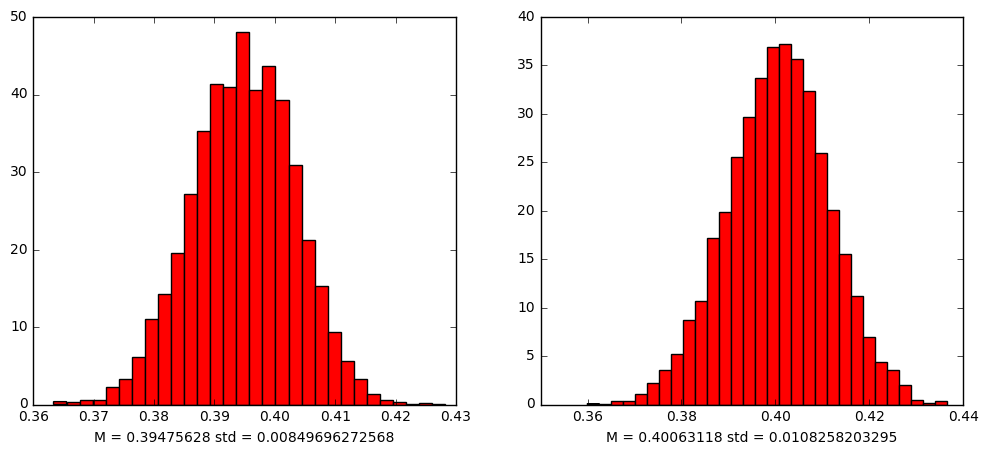

In [7]:

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.xlabel("M = " + str(mean5000_1) + " std = " + str(std5000_1))
bins1 = plt.hist(means5000_1, 30, normed=1, facecolor='red', alpha=1)

plt.subplot(122)
plt.xlabel("M = " + str(mean5000_2) + " std = " + str(std5000_2))
bins2 = plt.hist(means5000_2, 30, normed=1, facecolor='red', alpha=1)

In [8]:
print("abalones group 1 95% confidence interval ", (mean5000_1 - 1.96 * std5000_1, mean5000_1 + 1.96 * std5000_1))
print("abalones group 2 95% confidence interval ", (mean5000_2 - 1.96 * std5000_2, mean5000_2 + 1.96 * std5000_2))


abalones group 1 95% confidence interval  (0.3781022330576666, 0.41141032694233332)
abalones group 2 95% confidence interval  (0.37941257215409091, 0.42184978784590915)


thus they INTERSECT. This time we can say nothing to answer the question.

In [9]:
mean5000_diff = means5000_1 - mean5000_2
mean_diff = mean5000_1 - mean5000_2
int_ends = 1.96 * math.sqrt((math.pow(std5000_1, 2) / 5000) + (math.pow(std5000_2, 2) / 5000))
# print("MEAN", mean5000_diff.mean(), "| STD", mean5000_diff.std())
print("95% confidence interval of the difference of the means:", (mean_diff - int_ends,
                                                                  mean_diff + int_ends))

95% confidence interval of the difference of the means: (-0.0062563673245446304, -0.0054934326754555131)


Это не нужно, только про зазницу!so, there is no 0 point in interval and we can say that abalones of 2 groups are not equal (i mean the difference is not 0) in shell diameter feature with the confidence level of 95%. In addition, we can say that group 2 has greater shells in average because the difference confidens interval shifted to the negative side (left with respect to zero point) according to bootstrap method. This bias can also be shown by following histogram.

##VERY WRONG CONCLUSION вычесть одни средние из других возможно так как я независимо их делал по 5000

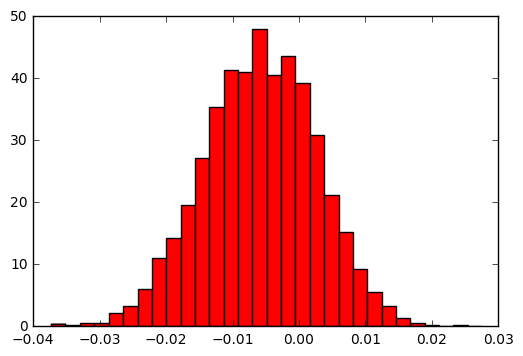

In [10]:
bins = plt.hist(mean5000_diff, 30, normed=1, facecolor='red', alpha=1)

<h1 align="center">HA #3 Scatterplot, linear regression, correlation and determinacy coefficients</h1>

In [10]:
from pandas.tools.plotting import scatter_matrix

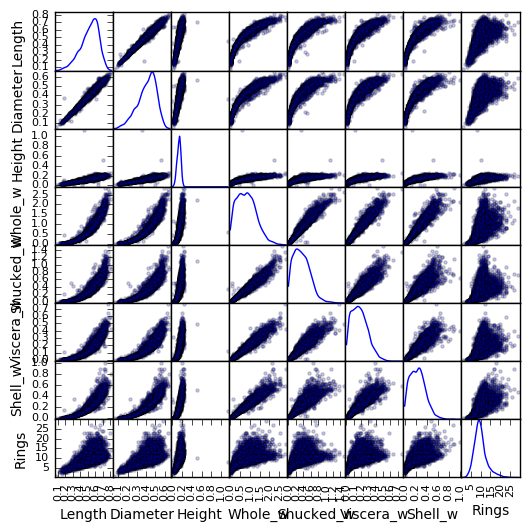

In [8]:
sc = scatter_matrix(pass_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

So, there are a lot of dependencies which look linear-like. In the following graph i've shown a Length-Height scatter plot which looks like a line most of all for me. What about non-linear, for instance, there is Whole_weight-Diameter plot, which looks like porabola. Also there are a lot of complex dependencies, like Shucked_weight-Rings. I have no idea what is it exactly, but i suppose it is not linear-like dependency (which is clear thanks to the fact that Rings count is the target variable of this data-set)

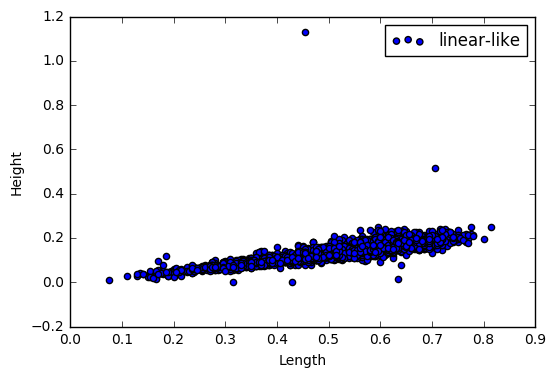

In [9]:
s = pass_data.plot.scatter(x="Length", y="Height", label="linear-like")

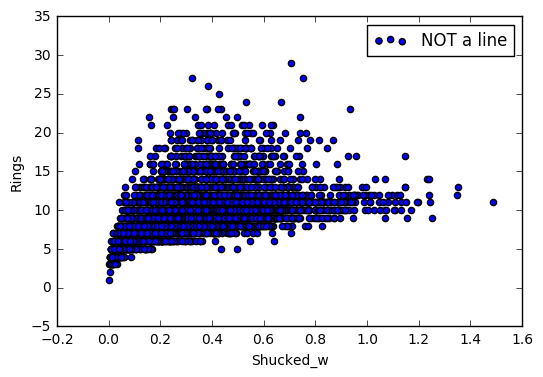

In [4]:
sc = pass_data.plot.scatter(x="Shucked_w", y="Rings", label="NOT a line")

Let's build a simple linear regression estimating a and b coefficient of a model. x-asix means lenght, y-axis means height.
$$y_i= a x_i + b + \varepsilon_i $$ Using the following formula.
$$\hat{b} = \bar{y} - \hat{a}\bar{x}$$
$$\hat{a} = \frac{\sum_i^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_i^n{(x_i-\bar{x})^2}}$$

In [15]:
X = np.array(list(pass_data["Length"]), dtype=float)
Y = np.array(list(pass_data["Height"]), dtype=float)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

est_a = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
est_b = Y_mean - est_a * X_mean
print("slope, a = ", est_a, "intersept, b = ", est_b)

slope, a =  0.288227930552 intersept, b =  -0.0115127591617


Accordingly to slope we can say, that, when the length of an abalone increases by 1 mm we predict that the height will increase by approximately ~0.288 mm.

In [16]:
#make prediction
Y_pred = est_a * X  + est_b
#r coef
Correlation = np.corrcoef(Y, Y_pred)[0][1]
#R^2 calc
Determinacy_coef = Correlation ** 2 # Unfortunately, the specific func for it is not found

print("r correlation coef =", Correlation, "| R^2 determinacy coef =", Determinacy_coef)


r correlation coef = 0.827553609319 | R^2 determinacy coef = 0.684844976297


The sign of r means the sign of slope a. so if lenght of abalone grows the height grows too. The value of r ~0.827 is located near the 1. It indicates how closely spaced points to a straight line. 0.827 means very good (but not excellent) linear correlation. R^2 ~0.68 is a proportion of the variance of dispersion Y which is tacken into account by regressin of Y over X. 0.68 is ok for reasonable linear model (it should be at least 0.5)

NOT COMPULSORY 
Estimate the 95% confidence intervals of the slope, intercept, and correlation coefficient by using a 5000 strong bootstrap resampling technique

In [24]:
slope_set = []
intersept_set = []
correlation_set = []
abalone_set_size = pass_data.shape[0]

for i in range(5000):
    FOO = np.array(pass_data[["Length", "Height"]].sample(n=abalone_set_size, replace=True), dtype=float)
    X = FOO[:, 0] #lenght
    Y = FOO[:, 1] #height
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    est_a = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
    est_b = Y_mean - est_a * X_mean
    Y_pred = est_a * X  + est_b
    Correlation = np.corrcoef(Y, Y_pred)[0][1]
    #fill sets with estimations
    slope_set.append(est_a) 
    intersept_set.append(est_b)
    correlation_set.append(Correlation)

To make things easier i will be using a non-pivotal method building intervals

In [19]:
slope_set.sort()
print("95% confidence interval for slope using bootstrap:", slope_set[125], slope_set[4875]) 
#cut off 5% of values (2.5% from each side)
intersept_set.sort()
print("95% confidence interval for intersept using bootstrap:", intersept_set[125], intersept_set[4875])
correlation_set.sort()
print("95% confidence interval for correlation using bootstrap:", correlation_set[125], correlation_set[4875])


95% confidence interval for slope using bootstrap: 0.283191585762 0.293251537416
95% confidence interval for intersept using bootstrap: -0.0140880689942 -0.00863279091893
95% confidence interval for correlation using bootstrap: 0.722545435808 0.903258205528


Well, this intervals cover estimated sclope, intersept and correlation score with the 95% probability. In addition, we can see that this intervals cover an estimations that we found at previous task. The resulting estimates are close to the centers of the intervals.

<h1 align="center">HA #4 Cross-validation for testing prediction methods and fitting regression by using nature-inspired approaches</h1>

In [133]:
# i will build a linear regression y = a * X + b like in the previous task
X = np.array(list(pass_data["Length"]), dtype=float)
y = np.array(list(pass_data["Height"]), dtype=float)
y[y == 0] = 0.00001

In [161]:
#put every item randomly into one of 10 buckets
indices_in_buckets = [[] for i in range(10)]
for i in range(X.shape[0]):
    indices_in_buckets[np.random.randint(0, 10)].append(i)
    
MSE_over_each_fold = []
all_idx = set([i for i in range(X.shape[0])])
for indices in indices_in_buckets:
    X_train, X_test = X[list(all_idx - set(indices))], X[indices]
    y_train, y_test = y[list(all_idx - set(indices))], y[indices]
    #build a regression over X_train and test on X_test
    X_tr_mean = np.mean(X_train)
    y_tr_mean = np.mean(y_train)
    est_a = np.sum((X_train - X_tr_mean) * (y_train - y_tr_mean)) / np.sum((X_train - X_tr_mean) ** 2)
    est_b = y_tr_mean - est_a * X_tr_mean
    y_pred = est_a * X_test + est_b
    MSE_over_each_fold.append(((y_test - y_pred) ** 2).mean())

In [162]:
MSE_over_each_fold

[0.000616174864292801,
 0.00026493464275016259,
 0.00026205201298679787,
 0.00023442159709623144,
 0.00025130582879782091,
 0.00025700944394991458,
 0.00032155498159154372,
 0.00031960571032660893,
 0.0026604600546613695,
 0.00027274003124381656]

In [163]:
np.array(MSE_over_each_fold).mean()

0.0005460259167697067

Thus, thanks to 10-fold cross-validation we can say how well the algorithm works for data at which it was not trained. In some parts it works better, in others it works worse, but it's pretty nice in average. Cross-validation gives us an idea about the quality of the algorithm on the new data.

***Nature Inspired algorithm***

In [155]:
# here i wrote a simple class which is doing a nature inspired alorithm to minimize the average relative error

def compute_relative_average_error(a, b, X, y):
    y_pred = a * X + b
    error = np.absolute(y_pred - y) / y
#     error = (y_pred - y) ** 2
    return error.mean()


class NatureInspired():
    def __init__(self, X, y, max_iter=100):
        self.X = np.array(X)
        self.y = np.array(y)
        self.max_iter = max_iter
#         compute boundary constants
        def get_boundaries():
            a = []
            b = []
            for i, j in itertools.combinations(list(range(self.X.shape[0])), 2):
                if (self.X[i] - self.X[j]) != 0:
                    a.append((self.y[i] - self.y[j]) / (self.X[i] - self.X[j]))
                    b.append((self.X[i] * self.y[j] - self.X[j] * self.y[i]) / (self.X[i] - self.X[j]))
                
#             print(a)
            a = sorted(a)[(len(a) // 5):(len(a) // 5) * 4]
            b = sorted(b)[(len(b) // 5):(len(b) // 5) * 4]
            a = np.array(a)
            b = np.array(b)
            
            return a.min(), a.max(), b.min(), b.max()
        
        self.am, self.Am, self.bm, self.Bm = get_boundaries()
#         print(self.am, self.Am, self.bm,  self.Bm)
        
        self.p = 100
        self.f = np.hstack((np.random.uniform(low=self.am, high=self.Am, size=(self.p, 1)), np.random.uniform(low=self.bm, high=self.Bm, size=(self.p, 1)))) #np.zeros((self.p, 2))
        self.elite = 0
        self.f_next = np.copy(self.f)
    
    
    def get_elite(self):
        rel_errors_means = np.array([compute_relative_average_error(a, b, self.X, self.y) for a, b in self.f_next])
        print("min mean rel err:", rel_errors_means.min())
        return self.f[rel_errors_means.argmin()]
            
        
    def normalize_population(self):
        for idx, unit in enumerate(self.f_next):
            if unit[0] < self.am:
                self.f_next[idx, 0] = self.am
            elif unit[0] > self.Am:
                self.f_next[idx, 0] = self.Am
            if unit[1] < self.bm:
                self.f_next[idx, 1] = self.bm
            elif unit[1] > self.am:
                self.f_next[idx, 1] = self.Bm
            
            
    def do_mutation(self):
        self.f_next = self.f + (np.random.normal(size=(self.p, 2)) * (np.repeat([self.f.mean(axis=0)], self.p, axis=0)) / 100)

        
    def run(self):
        self.elite = self.get_elite()
        for i in range(self.max_iter):
            self.do_mutation()
            self.normalize_population()
            new_elite = self.get_elite()
            self.elite = new_elite if compute_relative_average_error(new_elite[0], new_elite[1], self.X, self.y) < compute_relative_average_error(self.elite[0], self.elite[1], self.X, self.y) else self.elite
            self.f = 0.7 * self.f_next + 0.3 * np.repeat([self.elite], self.p, axis=0)
            


In [156]:
NI = NatureInspired(X=X, y=y)
NI.run()

min mean rel err: 1.32092493424
min mean rel err: 1.31950159028
min mean rel err: 1.32085962743
min mean rel err: 1.32258826422
min mean rel err: 1.32611968459
min mean rel err: 1.27242436215
min mean rel err: 1.28963200875
min mean rel err: 1.29151780928
min mean rel err: 1.28325252977
min mean rel err: 1.28487633703
min mean rel err: 1.28088087467
min mean rel err: 1.27974725498
min mean rel err: 1.2781514729
min mean rel err: 1.28019968952
min mean rel err: 1.28133387898
min mean rel err: 1.27732662076
min mean rel err: 1.27856284553
min mean rel err: 1.28003140065
min mean rel err: 1.2765909655
min mean rel err: 1.27451729675
min mean rel err: 1.27131614901
min mean rel err: 1.27204797403
min mean rel err: 1.27443199279
min mean rel err: 1.27445094198
min mean rel err: 1.27524565376
min mean rel err: 1.275227704
min mean rel err: 1.2739351123
min mean rel err: 1.27332155211
min mean rel err: 1.27154537574
min mean rel err: 1.27043758861
min mean rel err: 1.27004553088
min mean rel 

Well, we can see that the average relative error decreases (in general) from generation to generation. This algorithm can also minimize MSE and reachs a result such as CV-score in previous task of this home assignment (i mean 0.00055). For this porpose we need just change one error to another in function compute_relative_average_error, which is simple.
Next, i print an elite a and b from last generation (i built 100 of them).

In [157]:
NI.elite

array([ 0.16718049, -0.0526545 ])

As a result we have a prediction rule y = 0.16718049 * X - 0.0526545, according to 100-th generation using NI approach. 

<h1 align="center">HA #5 Contingency table, Quetelet index, Pearson chi-squared coefficient, visualization of association patterns</h1>

In [165]:
pass_data.head(1)

,Sex,Length,Diameter,Height,Whole_w,Shucked_w,Viscera_w,Shell_w,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


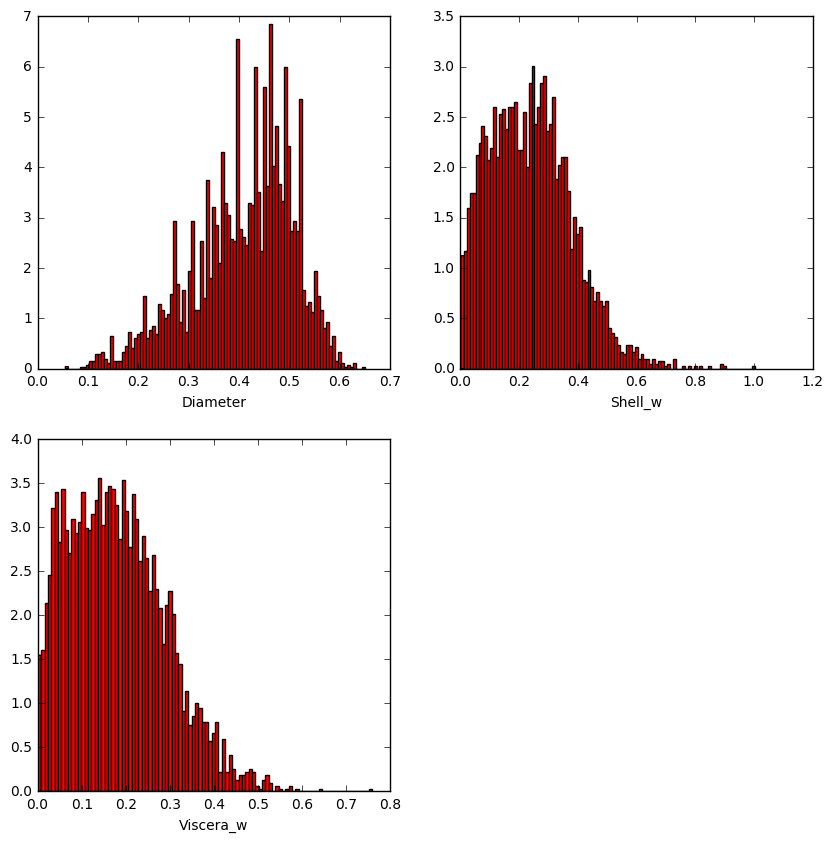

In [16]:
#compute hists to generate nominal features from quantitative
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.xlabel("Diameter")
bins1 = plt.hist(pass_data['Diameter'], 100, normed=1, facecolor='red', alpha=1)

# plt.figure(figsize=(10, 10))
plt.subplot(222)
plt.xlabel("Shell_w")
bins1 = plt.hist(pass_data['Shell_w'], 100, normed=1, facecolor='red', alpha=1)

# plt.figure(figsize=(10, 10))
plt.subplot(223)
plt.xlabel("Viscera_w")
bins1 = plt.hist(pass_data['Viscera_w'], 100, normed=1, facecolor='red', alpha=1)

In [22]:
# I develope 3 nominal features by following thresholds
Diam = [0, 0.3, 0.445, 0.53, 0.7]
Shel_w = [0, 0.14, 0.22, 0.32, 1.2]
vincera_w = [0, 0.066, 0.28, 0.8]


In [23]:
Vincera_w_and_diam_category = pd.DataFrame(columns=['D1', 'D2', 'D3', 'D4', 'Total'], index=['V1', 'V2', 'V3', 'Total'], dtype=float)
Vincera_w_and_shell_w_category = pd.DataFrame(columns=['S1', 'S2', 'S3', 'S4', 'Total'], index=Vincera_w_and_diam_category.index, dtype=float)

In [24]:
for i in range(3):
    for j in range(4):
        Vincera_w_and_diam_category.ix[i, j] = pass_data[(pass_data['Diameter'] >= Diam[j]) & (pass_data['Diameter'] < Diam[j+1]) & (pass_data['Viscera_w'] >= vincera_w[i]) & (pass_data['Viscera_w'] < vincera_w[i+1])].shape[0]
        Vincera_w_and_shell_w_category.ix[i, j] = pass_data[(pass_data['Shell_w'] >= Shel_w[j]) & (pass_data['Shell_w'] < Shel_w[j+1]) & (pass_data['Viscera_w'] >= vincera_w[i]) & (pass_data['Viscera_w'] < vincera_w[i+1])].shape[0]

In [25]:
Vincera_w_and_diam_category['Total'] = Vincera_w_and_diam_category.sum(axis=1)
Vincera_w_and_diam_category.ix[3,:] = Vincera_w_and_diam_category.sum(axis=0)
Vincera_w_and_shell_w_category['Total'] = Vincera_w_and_shell_w_category.sum(axis=1)
Vincera_w_and_shell_w_category.ix[3,:] = Vincera_w_and_shell_w_category.sum(axis=0)


In [26]:
Vincera_w_and_diam_category

,D1,D2,D3,D4,Total
V1,596.0,124.0,0.0,0.0,720.0
V2,25.0,1630.0,987.0,37.0,2679.0
V3,0.0,13.0,465.0,300.0,778.0
Total,621.0,1767.0,1452.0,337.0,4177.0


In [27]:
Vincera_w_and_shell_w_category

,S1,S2,S3,S4,Total
V1,714.0,5.0,0.0,1.0,720.0
V2,424.0,807.0,1013.0,435.0,2679.0
V3,0.0,3.0,83.0,692.0,778.0
Total,1138.0,815.0,1096.0,1128.0,4177.0


In [28]:
concontingency_t_diam = Vincera_w_and_diam_category.copy()
concontingency_t_shell_w = Vincera_w_and_shell_w_category.copy()
for i in range(3):
    concontingency_t_diam.ix[i,:-1] /= concontingency_t_diam.ix[3,:-1]
    concontingency_t_shell_w.ix[i,:-1] /= concontingency_t_shell_w.ix[3,:-1]

concontingency_t_diam = concontingency_t_diam.round(3)
concontingency_t_shell_w = concontingency_t_shell_w.round(3)

In [29]:
# next i presented 2 conditional frequency tables
concontingency_t_diam

,D1,D2,D3,D4,Total
V1,0.96,0.070,0.00,0.00,720.0
V2,0.04,0.922,0.68,0.11,2679.0
V3,0.00,0.007,0.32,0.89,778.0
Total,621.00,1767.000,1452.00,337.00,4177.0


There we can see, especially V1 given D1, V2 given D2 and V3 given D4, so, the almost conceptual rules are: D1 -> V1, D2 -> V2, D4 -> V3

In [30]:
# conditional frequency
concontingency_t_shell_w

,S1,S2,S3,S4,Total
V1,0.627,0.006,0.000,0.001,720.0
V2,0.373,0.990,0.924,0.386,2679.0
V3,0.000,0.004,0.076,0.613,778.0
Total,1138.000,815.000,1096.000,1128.000,4177.0


There we can see, especially V1 given S1, V2 given S2 and V3 given S4, so, the almost conceptual rules are: S2 -> V2, S4 -> V3, S1 -> V1

In [31]:
# i calculate q(Vk|Sk) & q(Vk|Dl) using formula on slide 24
Quetelet_relative_idx_t_diam = Vincera_w_and_diam_category.copy()
Quetelet_relative_idx_t_shell_w = Vincera_w_and_shell_w_category.copy()

Quetelet_relative_idx_t_diam = Quetelet_relative_idx_t_diam.drop(['Total'], axis=1)
Quetelet_relative_idx_t_shell_w = Quetelet_relative_idx_t_shell_w.drop(['Total'], axis=1)

Quetelet_relative_idx_t_diam['P(Vk)'] = Quetelet_relative_idx_t_diam.sum(axis=1) / Quetelet_relative_idx_t_diam.sum(axis=1).sum()
Quetelet_relative_idx_t_shell_w['P(Vk)'] = Quetelet_relative_idx_t_shell_w.sum(axis=1) / Quetelet_relative_idx_t_shell_w.sum(axis=1).sum()

Quetelet_relative_idx_t_diam.ix[3,:] = Quetelet_relative_idx_t_diam.sum(axis=0)
Quetelet_relative_idx_t_shell_w.ix[3,:] = Quetelet_relative_idx_t_shell_w.sum(axis=0)

for i in range(3):
    Quetelet_relative_idx_t_diam.ix[i,:-1] /= Quetelet_relative_idx_t_diam.ix[3,:-1]
    Quetelet_relative_idx_t_shell_w.ix[i,:-1] /= Quetelet_relative_idx_t_shell_w.ix[3,:-1]


# Quetelet calculations
for j in range(4):
    Quetelet_relative_idx_t_diam.ix[:-1,j] -= Quetelet_relative_idx_t_diam.ix[:-1,4]
    Quetelet_relative_idx_t_diam.ix[:-1,j] /= Quetelet_relative_idx_t_diam.ix[:-1,4]
    Quetelet_relative_idx_t_shell_w.ix[:-1,j] -= Quetelet_relative_idx_t_shell_w.ix[:-1,4]
    Quetelet_relative_idx_t_shell_w.ix[:-1,j] /= Quetelet_relative_idx_t_shell_w.ix[:-1,4]

Quetelet_relative_idx_t_diam = Quetelet_relative_idx_t_diam.round(3)
Quetelet_relative_idx_t_shell_w = Quetelet_relative_idx_t_shell_w.round(3)
Quetelet_relative_idx_t_diam.ix[:-1,:-1]

,D1,D2,D3,D4
V1,4.568,-0.593,-1.000,-1.000
V2,-0.937,0.438,0.060,-0.829
V3,-1.000,-0.961,0.719,3.779


We intrested in the highest positive and negative values in this table. According to Quetelet index table we can say that on average the knowledge of D1 "adds" 456.8% to frequency of V1, the knowledge of D4 "adds" 377.9% to frequency of V3, similarly. On the other side, the knowledge of D4, for instance, reduces the frequency of V1 by 100%. We can interpret it similarly in other cases. 

In [32]:
Quetelet_relative_idx_t_shell_w.ix[:-1,:-1]

,S1,S2,S3,S4
V1,2.640,-0.964,-1.000,-0.995
V2,-0.419,0.544,0.441,-0.399
V3,-1.000,-0.980,-0.593,2.294


According to this table we can say that the knowledge of S1 increases the frequency of V1 by 264% and, e.g. the knowledge of S2 reduces the frequency of V1 by 96.4% and so on.

Also i computed a summary Quetelet index which is the inner product of two tables that of co-occurrence relative frequency and Quetelet. For Viscera_w-Diam the result is Q = 1.155, it means that on average knowledge of Dl “adds” 115.5% to frequency of Vk. For Viscera_w-Shell_w the result is Q = 0.945, it means that on average knowledge of Sl “adds” 94.5% to frequency of Vk.

In [270]:
# Comp chi-square-summary_quetelet_index over both tables 
# tables like on slide 37

# Observed (relative) frequencies = first table
first_table_diam = Vincera_w_and_diam_category.copy()
first_table_shell = Vincera_w_and_shell_w_category.copy()
first_table_diam /= pass_data.shape[0]
first_table_shell /= pass_data.shape[0]
first_table_diam = first_table_diam.round(3)
first_table_shell = first_table_shell.round(3)

# Frequencies expected under independence = second table
second_table_diam = first_table_diam.copy()
second_table_shell = first_table_shell.copy()
for i in range(4):
    for j in range(4):
        second_table_diam.ix[i, j] = second_table_diam.ix[i,4] * second_table_diam.ix[3,j]
        second_table_shell.ix[i, j] = second_table_shell.ix[i,4] * second_table_shell.ix[3,j]

second_table_diam = second_table_diam.round(3)
second_table_shell = second_table_shell.round(3)

In [271]:
first_table_diam

,D1,D2,D3,D4,Total
V1,0.143,0.030,0.000,0.000,0.172
V2,0.006,0.390,0.236,0.009,0.641
V3,0.000,0.003,0.111,0.072,0.186
Total,0.149,0.423,0.348,0.081,1.000


In [272]:
first_table_shell

,S1,S2,S3,S4,Total
V1,0.172,0.000,0.000,0.000,0.172
V2,0.497,0.133,0.009,0.002,0.641
V3,0.009,0.110,0.042,0.021,0.183
Total,0.679,0.243,0.051,0.023,0.996


In [273]:
second_table_diam

,D1,D2,D3,D4,Total
V1,0.026,0.073,0.060,0.014,0.172
V2,0.096,0.271,0.223,0.052,0.641
V3,0.028,0.079,0.065,0.015,0.186
Total,0.149,0.423,0.348,0.081,1.000


In [274]:
second_table_shell

,S1,S2,S3,S4,Total
V1,0.117,0.042,0.009,0.004,0.172
V2,0.435,0.156,0.033,0.015,0.641
V3,0.124,0.044,0.009,0.004,0.183
Total,0.676,0.242,0.051,0.023,0.996


In [278]:
# MAke r(k,l) tables
r_k_l_diam_table = pd.DataFrame(columns=['D1', 'D2', 'D3', 'D4'], index=['V1', 'V2', 'V3'])
r_k_l_shell_table = pd.DataFrame(columns=['S1', 'S2', 'S3', 'S4'], index=['V1', 'V2', 'V3'])

for i in range(3):
    for j in range(4):
        r_k_l_diam_table.ix[i, j] = (first_table_diam.ix[i,j] - second_table_diam.ix[i,j]) * second_table_diam.ix[i,j] ** (-1/2)
        r_k_l_shell_table.ix[i, j] = (first_table_shell.ix[i,j] - second_table_shell.ix[i,j]) * second_table_shell.ix[i,j] ** (-1/2)

In [279]:
r_k_l_diam_table

,D1,D2,D3,D4
V1,0.725603,-0.15915,-0.244949,-0.118322
V2,-0.290474,0.228593,0.027529,-0.188567
V3,-0.167332,-0.270396,0.180427,0.465403


In [280]:
r_k_l_shell_table

,S1,S2,S3,S4
V1,0.160794,-0.204939,-0.0948683,-0.0632456
V2,0.0940042,-0.0582325,-0.132116,-0.106145
V3,-0.326578,0.314643,0.347851,0.268794


In [285]:
# X^2 calc
print("X^2 viscera and diam:", (r_k_l_diam_table ** 2).sum().sum())
print("X^2 viscera and shell:", (r_k_l_shell_table ** 2).sum().sum())

X^2 viscera and diam: 1.149041689715217
X^2 viscera and shell: 0.5207069460325856


# NEEED TO COMMENT ON BY SLIDE 54# sd

<h1 align="center">HA #6 Tabular regression and correlation ratio</h1>

HI there! Now we build a tabular regression using Rings count as a target feature over Diameter and Shell_w

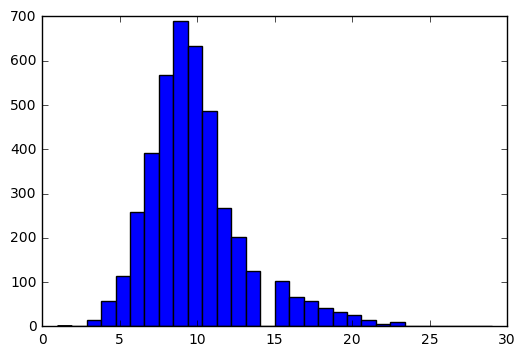

In [177]:
h = plt.hist(pass_data['Rings'], bins=30)

In [329]:
rings_threshold = [0, 8, 12, 30]

In [330]:
tab_regr_rings_diam = pd.DataFrame(columns=['num', 'diam mean', 'diam std'], index=['young', 'mat', 'old', 'Total'])
tab_regr_rings_shell_w = pd.DataFrame(columns=['num', 'shell w mean', 'shell w std'], index=['young', 'mat', 'old', 'Total'])

for i in range(4): #num
    this_group_data = pass_data[(pass_data['Rings'] > rings_threshold[i]) & (pass_data['Rings'] <= rings_threshold[i+1])] if i != 3 else pass_data 
    
    tab_regr_rings_diam.ix[i, 'num'] = this_group_data.shape[0]
    tab_regr_rings_shell_w.ix[i, 'num'] = this_group_data.shape[0]
    
    tab_regr_rings_diam.ix[i, 'diam mean'] = this_group_data['Diameter'].mean()
    tab_regr_rings_shell_w.ix[i, 'shell w mean'] = this_group_data['Shell_w'].mean()
    
    tab_regr_rings_diam.ix[i, 'diam std'] = this_group_data['Diameter'].std()
    tab_regr_rings_shell_w.ix[i, 'shell w std'] = this_group_data['Shell_w'].std()
    
    
    

In [331]:
tab_regr_rings_diam

,num,diam mean,diam std
young,1407,0.321276,0.0902919
mat,2077,0.44799,0.0718845
old,693,0.463506,0.0647218
Total,4177,0.407881,0.0992399


In [332]:
tab_regr_rings_shell_w

,num,shell w mean,shell w std
young,1407,0.121394,0.0809648
mat,2077,0.281119,0.113665
old,693,0.350519,0.137686
Total,4177,0.238831,0.139203


In [342]:

# let's figure out the correlation ratio over two tabular regressions using formula on page 5 (lecture 6)
eta_diam = 1 - ((tab_regr_rings_diam.ix[:-1,0] / tab_regr_rings_diam.ix[-1,0]) * (tab_regr_rings_diam.ix[:-1,-1] ** 2)).sum() / (tab_regr_rings_diam.ix[3,2] ** 2)
eta_shell = 1 - ((tab_regr_rings_shell_w.ix[:-1,0] / tab_regr_rings_shell_w.ix[-1,0]) * (tab_regr_rings_shell_w.ix[:-1,-1] ** 2)).sum() / (tab_regr_rings_shell_w.ix[3,2] ** 2)

print("Correlation ratio Rings/Diameter %.2f" % (eta_diam * 100), '%')
print("Correlation ratio Rings/Shell_w %.2f" % (eta_shell * 100), '%')

Correlation ratio Rings/Diameter 38.97 %
Correlation ratio Rings/Shell_w 39.22 %


The second table shows the greater correlation. It means that relations are stronger between Rings and Shell_w than between Rings and Diameter.

<h1 align="center">HA #7 Prediction one binary feature by another one, metrics of accuracy</h1>

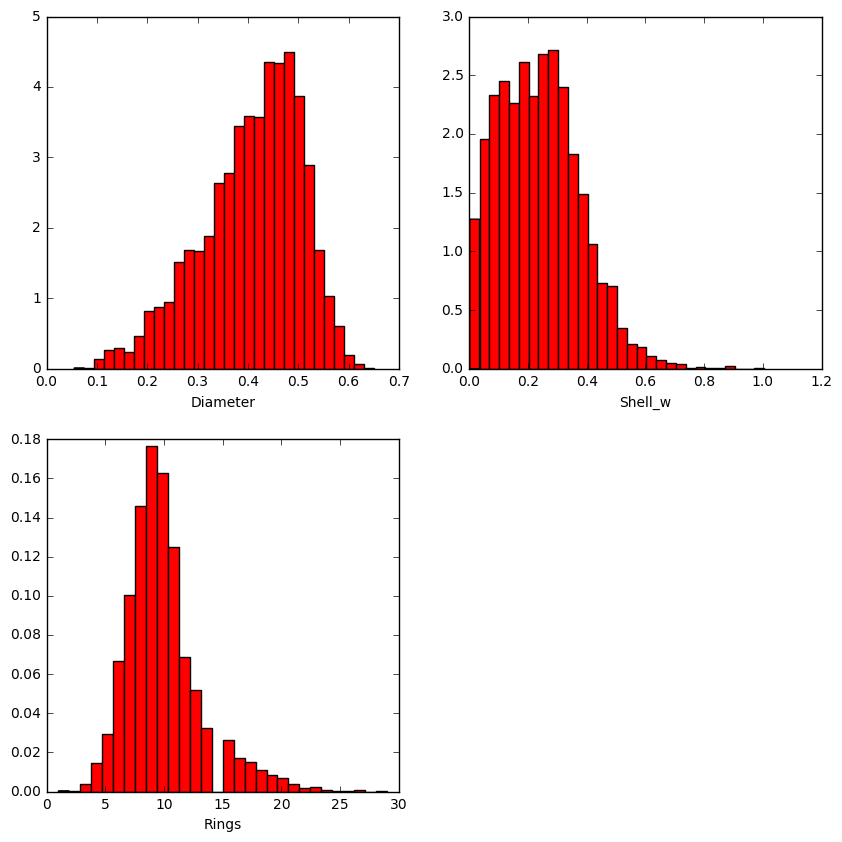

In [15]:
#compute hists in order to binarize features (Diameter, Shell_w, Rings) i assume Rings as a target
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.xlabel("Diameter")
bins1 = plt.hist(pass_data['Diameter'], 30, normed=1, facecolor='red', alpha=1)

plt.subplot(222)
plt.xlabel("Shell_w")
bins1 = plt.hist(pass_data['Shell_w'], 30, normed=1, facecolor='red', alpha=1)

plt.subplot(223)
plt.xlabel("Rings")
bins1 = plt.hist(pass_data['Rings'], 30, normed=1, facecolor='red', alpha=1)

In [188]:
X = pass_data[['Diameter', 'Shell_w', 'Rings']]

In [189]:
X.head(1)

,Diameter,Shell_w,Rings
0,0.365,0.15,15


In [190]:
def binarize_diameter(x):
    return 0 if x < 0.46 else 1


def binarize_shell_w(x):
    return 0 if x < 0.3 else 1


def binarize_rings(x):
    return 0 if x < 10 else 1

In [191]:
X['Diameter'] = X['Diameter'].apply(binarize_diameter) 
X['Shell_w'] = X['Shell_w'].apply(binarize_shell_w)
X['Rings'] = X['Rings'].apply(binarize_rings)
X.head(5)

,Diameter,Shell_w,Rings
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0


In [202]:
# in this task I  use a constant prediction rule y_pred = X to predict target (Rings) by Diameter and Shell_w
# next, i build a prediction matrices(or confusion, which is equal) and compute  some accuracy metrices, 
# including F1-measure and comment on the result

# using the constant prediction rule
# [[TP, FP],
#  [FN, TN]]
print("prediction table Rings-Diameter\n", confusion_matrix(X['Rings'], X['Diameter']))
print("prediction table Rings-Shell_w\n", confusion_matrix(X['Rings'], X['Shell_w']))
print("accuracy for diam:", accuracy_score(X['Rings'], X['Diameter']))
print("accuracy for shell_w:", accuracy_score(X['Rings'], X['Shell_w']))
precision_diam = precision_score(X['Rings'], X['Diameter'])
precision_shell = precision_score(X['Rings'], X['Shell_w'])
print("precision for diam:", precision_diam)
print("precision for shell_w:", precision_shell)
recall_diam = recall_score(X['Rings'], X['Diameter'])
recall_shell = recall_score(X['Rings'], X['Shell_w'])
print("recall for diam:", recall_diam)
print("recall for shell_w:", recall_shell)
print("F1 score for diam:", 2 * precision_diam * recall_diam / (precision_diam + recall_diam))
print("F1 score for shell_w:", 2 * precision_shell * recall_shell / (precision_shell + recall_shell))
# [[TP, FP],
#  [FN, TN]]

prediction table Rings-Diameter
 [[1757  339]
 [ 918 1163]]
prediction table Rings-Shell_w
 [[1881  215]
 [ 954 1127]]
accuracy for diam: 0.699066315537
accuracy for shell_w: 0.720134067513
precision for diam: 0.774300932091
precision for shell_w: 0.839791356185
recall for diam: 0.558865929841
recall for shell_w: 0.541566554541
F1 score for diam: 0.649176667597
F1 score for shell_w: 0.658486707566


Thus, we can see that target feature predicted more accurately by binarized shell_w than by binarized diameter according to F1 score and accuracy.
According to the precision score we can see the same situation. It means that by Shell_w we classified as 1-class the most part in truly 1-class targets than by Diameter. Next, according to recall, we found the opposite result. In that case we we classified the most part of 1-class targets by Diameter than by shell_w. So, using the constant prediction rule, we have good results in accuracy and precision in both ways to predict a target, but not so good in recall.

<h1 align="center">HA #8 K-means clustering</h1>

In [4]:
# In this cell i wrote a simple class which is doing a version of K-means clustering
#c_k - centers array
#s_k - indices of items in original dataset which are covered by k-th class 
class KMeansClustering():
    
    def __init__(self, c_k, K):
        self.c_k = c_k #np.array
        self.s_k = [[] for i in range(K)] #indices in each class
        self.max_iter = 100
        
    
    def update_sets(self, X):
        def get_class(x):
            distances = np.array([((c_k_i - x) ** 2).sum() for c_k_i in self.c_k]) 
            return distances.argmin()
            
        self.s_k = [[] for i in range(len(self.s_k))]
        for idx, item in enumerate(X):
            self.s_k[get_class(item)].append(idx)
        
    
        def update_centers(X):
            c_k_dump = np.copy(self.c_k)
            for i in range(self.c_k.shape[0]):
                self.c_k[i] = X[self.s_k[i]].mean(axis=0)
            self.c_k = self.c_k.round(4)
            
            return c_k_dump
        
        return update_centers(X)
        
        
    def run(self, X): #required X matrix
        iterations = 0
        while np.count_nonzero(self.update_sets(X) != self.c_k):
            iterations += 1
            if iterations == self.max_iter:
                break
        return iterations
            
        

In [21]:
# first of all i apply k = 3,4 and 7 with random generated (from uniform[0,1] distribution) center's initializations 
# to 4 quantitative features ['Length', 'Diameter', 'Whole_w', 'Shell_w'] from my dataset
K = 3
KMC = KMeansClustering(c_k=np.random.uniform(size=(K, pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']].shape[1])), K=K)
print(KMC.run(np.array(pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']])))
KMC.c_k

26


array([[ 0.4033,  0.3077,  0.3488,  0.1057],
       [ 0.6657,  0.5252,  1.5683,  0.4383],
       [ 0.5717,  0.4477,  0.937 ,  0.2715]])

In [32]:
K = 4
KMC = KMeansClustering(c_k=np.random.uniform(size=(K, pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']].shape[1])), K=K)
print(KMC.run(np.array(pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']])))
KMC.c_k

21


array([[ 0.6861,  0.5414,  1.7413,  0.4834],
       [ 0.3652,  0.2768,  0.2564,  0.0786],
       [ 0.5198,  0.404 ,  0.6899,  0.2044],
       [ 0.6096,  0.4791,  1.1485,  0.3276]])

In [146]:
K = 7
KMC = KMeansClustering(c_k=np.random.uniform(size=(K, pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']].shape[1])), K=K)
print(KMC.run(np.array(pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']])))
KMC.c_k

100


array([[    nan,     nan,     nan,     nan],
       [ 0.524 ,  0.4079,  0.8287,  0.2388],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan]])

Unfortunately, no one of more than 20 attemts converges with K=7 and randomly initialized centers using my K-means clustering realization. In following cells i choose centers manually. 

In [147]:
c_k = np.array([[0, 0, 0, 0],
                [1, 1, 1, 1],
                [0.5, 0.5, 0.5, 0.5]])
K = 3
KMC = KMeansClustering(c_k=c_k, K=K)
print(KMC.run(np.array(pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']])))
KMC.c_k

28


array([[ 0.4033,  0.3077,  0.3488,  0.1057],
       [ 0.6657,  0.5252,  1.5683,  0.4383],
       [ 0.5717,  0.4477,  0.937 ,  0.2715]])

In [148]:
c_k = np.array([[0, 0, 0, 0],
                [1, 1, 1, 1],
                [0.5, 0.5, 0.5, 0.5],
                [1.2,1.2,1.5,1.2]])
K = 4
KMC = KMeansClustering(c_k=c_k, K=K)
print(KMC.run(np.array(pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']])))
KMC.c_k

46


array([[ 0.3654,  0.2769,  0.2568,  0.0787],
       [ 0.6097,  0.4792,  1.1492,  0.3277],
       [ 0.5201,  0.4042,  0.6909,  0.2048],
       [ 0.6861,  0.5414,  1.7413,  0.4834]])

In [156]:
c_k = np.array([[0, 0, 0, 0],
                [1, 1, 1, 1],
                [0.5, 0.5, 0.5, 0.5],
                [1.2,1.2,1.5,1.2],
                [0.5, 0.1, 2, 0.5],
                [0.01, 0.2, 0.4, 0.6],
                [0.2, 0.2, 0.2, 0.2]])
K = 7
KMC = KMeansClustering(c_k=c_k, K=K)
KMC.max_iter = 10
print(KMC.run(np.array(pass_data[['Length', 'Diameter', 'Whole_w', 'Shell_w']])))
KMC.c_k

10


array([[    nan,     nan,     nan,     nan],
       [ 0.524 ,  0.4079,  0.8287,  0.2388],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan],
       [    nan,     nan,     nan,     nan]])

Thus, in case of my dataset, i think, that there is no reason to initialize centers by hands because i can't figure out centers which would probably lead to a convergence of 7-means clustering, while for k=3 and k=4 random and manual initializations work the same. Therefore, random initialization from uniform distribution seems to me as a better choice. 

What about K-constant...

In [30]:
for i in range(3): #K=3, random init
    print(i, "-ckass;", 'k-size', pass_data.ix[KMC.s_k[i],:].shape[0], ';r mean over class', pass_data.ix[KMC.s_k[i],:]['Rings'].mean(), ';r std over class', pass_data.ix[KMC.s_k[i],:]['Rings'].std(), ';')
    

0 -ckass; k-size 1634 ;r mean over class 7.935128518971848 ;r std over class 2.415900028424823 ;
1 -ckass; k-size 806 ;r mean over class 12.048387096774194 ;r std over class 3.1050175589317184 ;
2 -ckass; k-size 1737 ;r mean over class 10.832469775474957 ;r std over class 2.898459059921487 ;


It is a nice result! We found 3 clasters with a small, mid and large number of rings like in HW6 where i set up a boundaries as rings_threshold = [0, 8, 12, 30].

In [33]:
for i in range(4): #K=4, random init
    print(i, "-ckass;", 'k-size', pass_data.ix[KMC.s_k[i],:].shape[0], ';r mean over class', pass_data.ix[KMC.s_k[i],:]['Rings'].mean(), ';r std over class', pass_data.ix[KMC.s_k[i],:]['Rings'].std(), ';')
    

0 -ckass; k-size 460 ;r mean over class 12.41304347826087 ;r std over class 3.162112907111507 ;
1 -ckass; k-size 1118 ;r mean over class 7.283542039355993 ;r std over class 2.1528680405292184 ;
2 -ckass; k-size 1332 ;r mean over class 10.038288288288289 ;r std over class 2.706122853742451 ;
3 -ckass; k-size 1267 ;r mean over class 11.262036306235201 ;r std over class 2.94324996165015 ;


So, it's great again! Have a look, now we found an additional cluster which is located between threshold of 10 and 12. In conclusion, both 3-k and 4-k clustering give a good result, but i prefer the last way because the bigger, the better. Likewise, i have already had an idea to add this cluster (with 11 as mean) in HW 6. This is why i choose 4-k means clustering with random initializated centers.   